In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder


plt.ion()  # Turn on interactive mode
# Load dataset
df = pd.read_csv('cleaned_dataset.csv')

print("Basic Info About the Dataset:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

Basic Info About the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 

### Distribution of Numeric Features

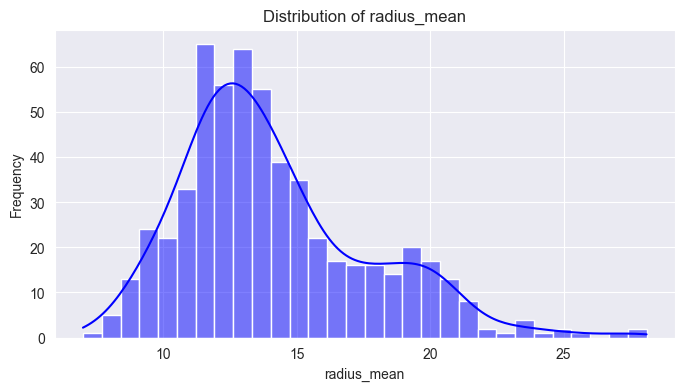

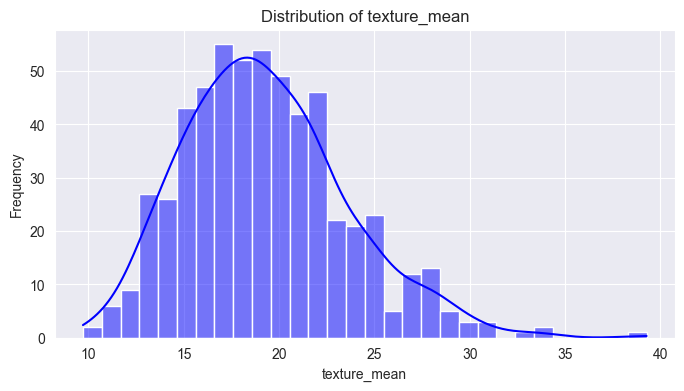

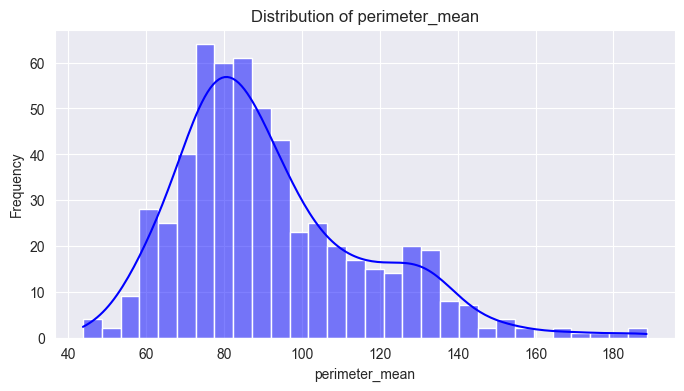

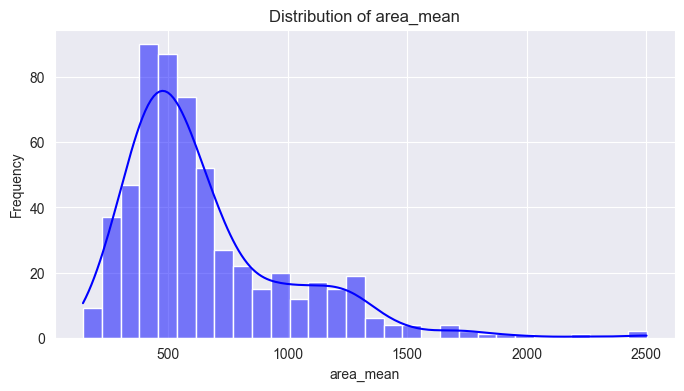

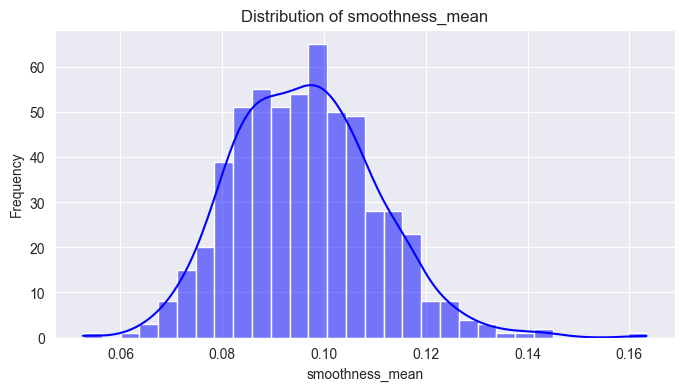

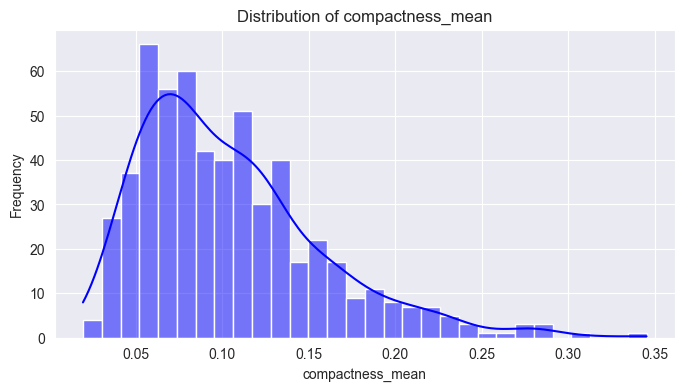

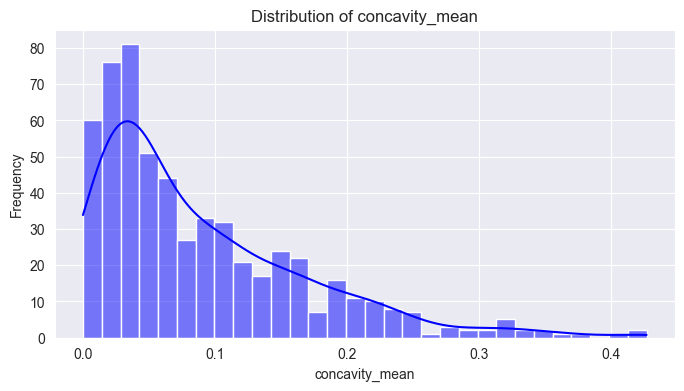

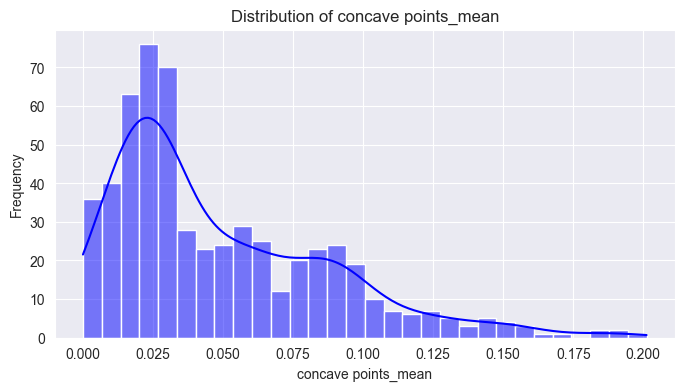

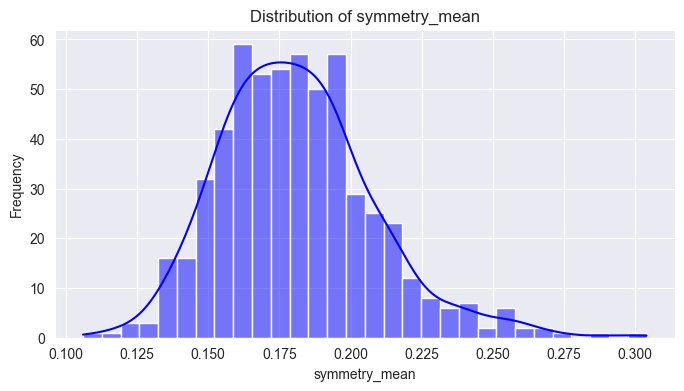

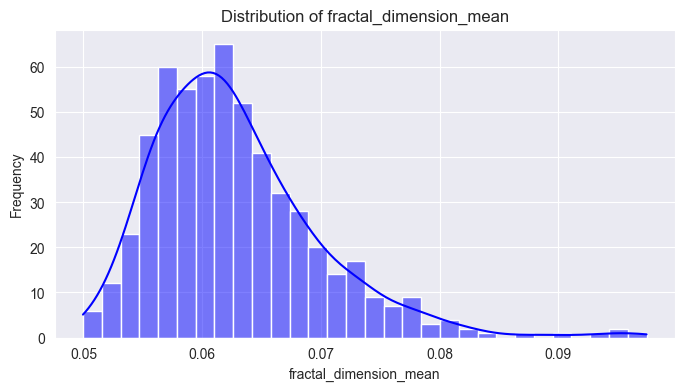

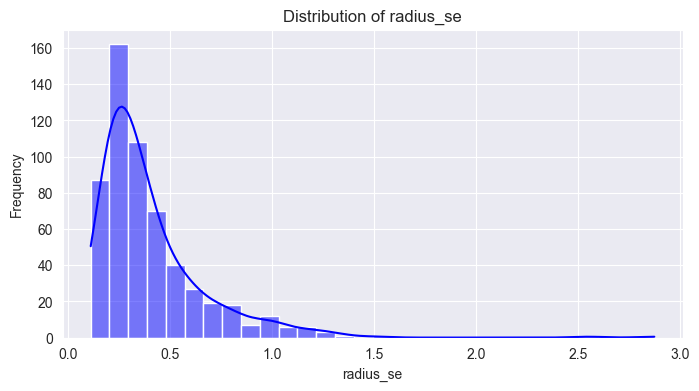

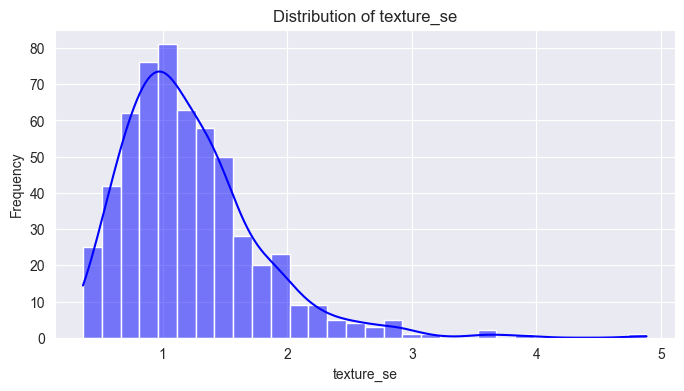

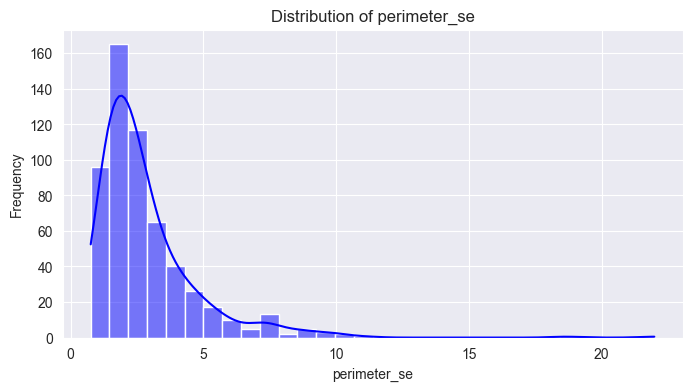

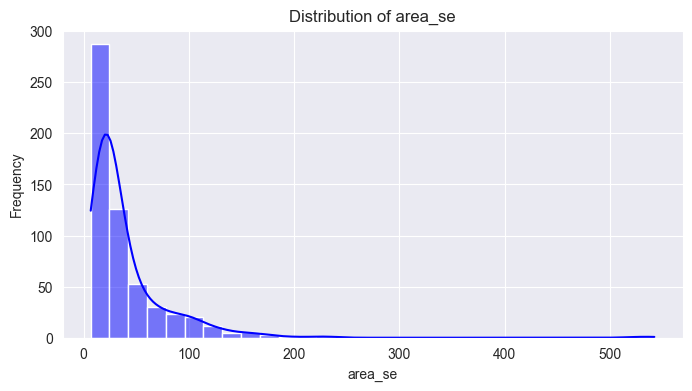

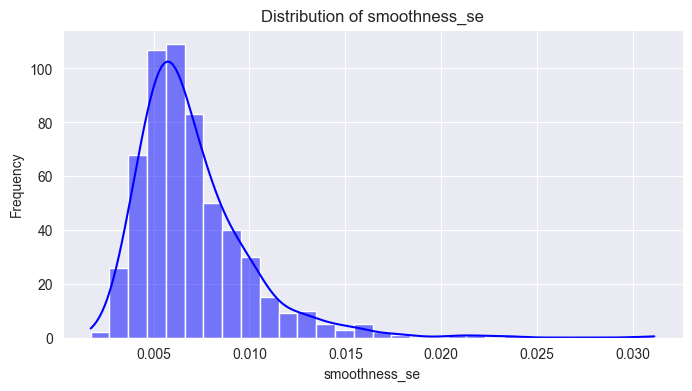

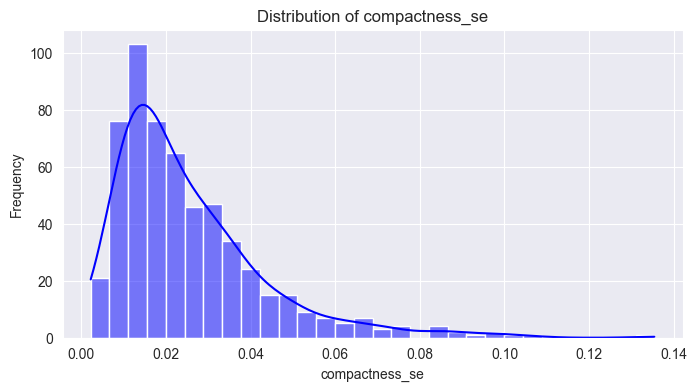

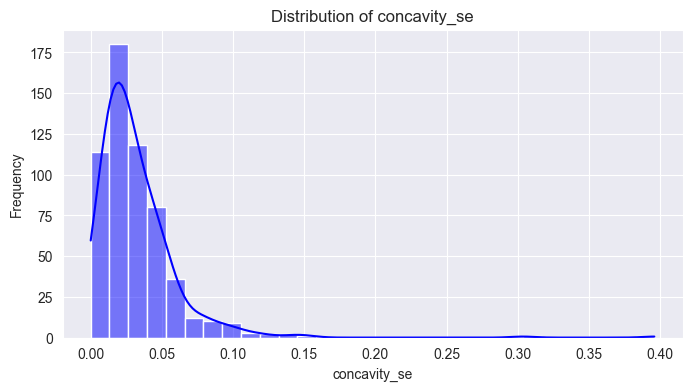

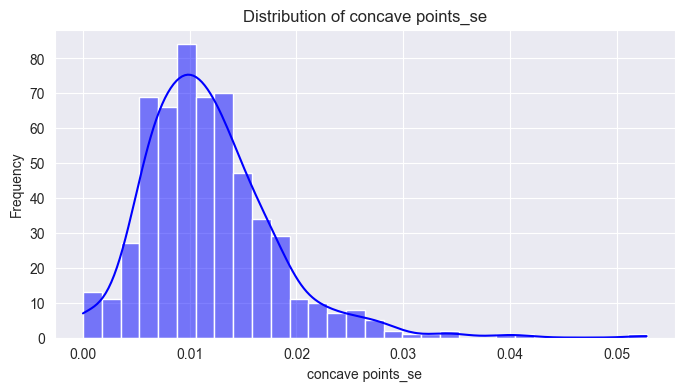

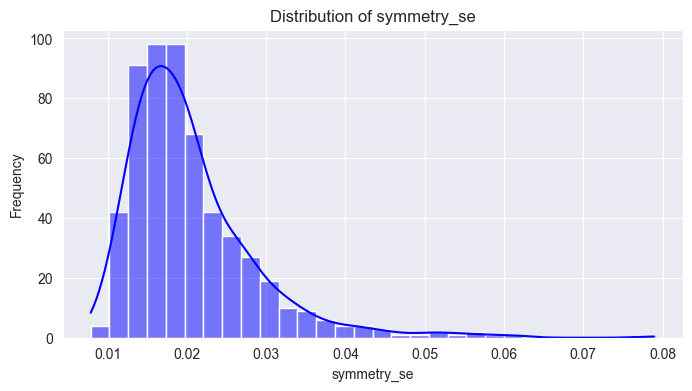

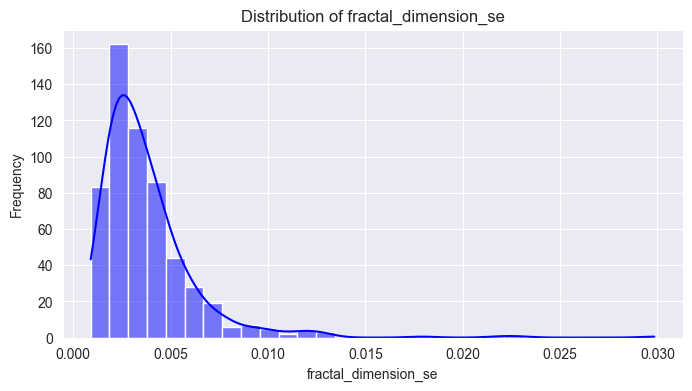

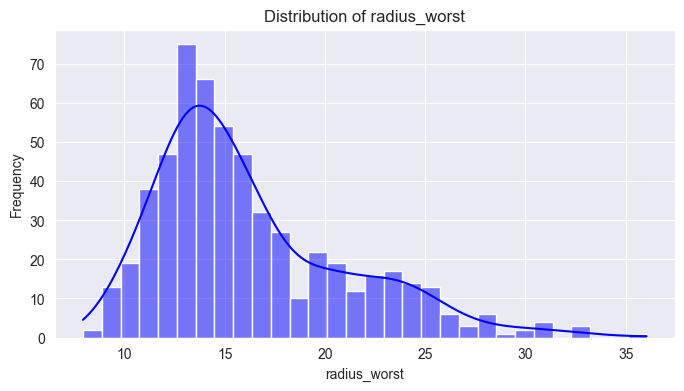

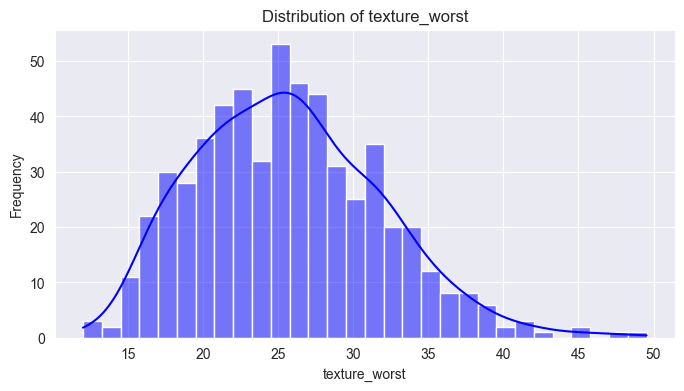

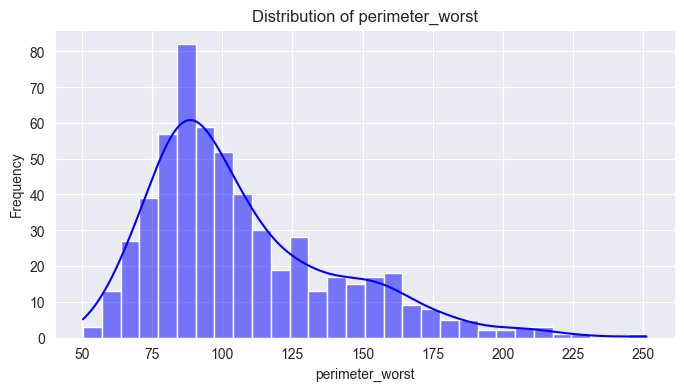

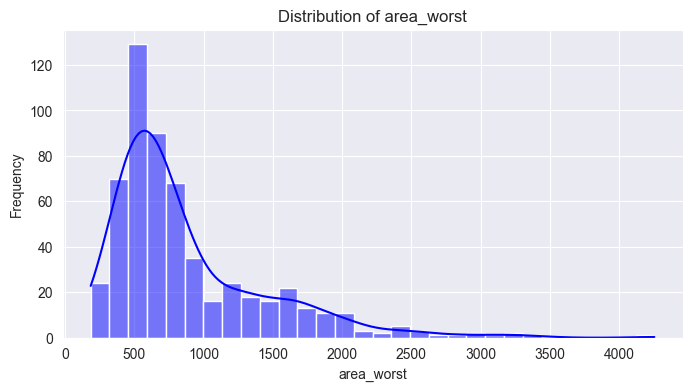

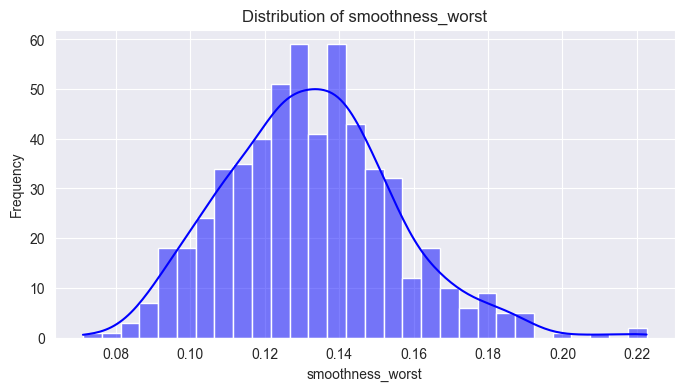

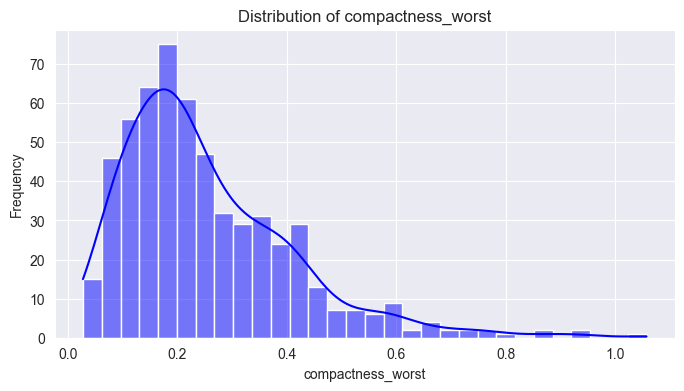

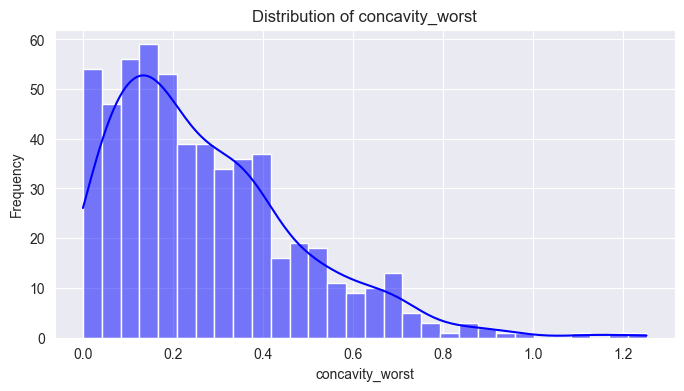

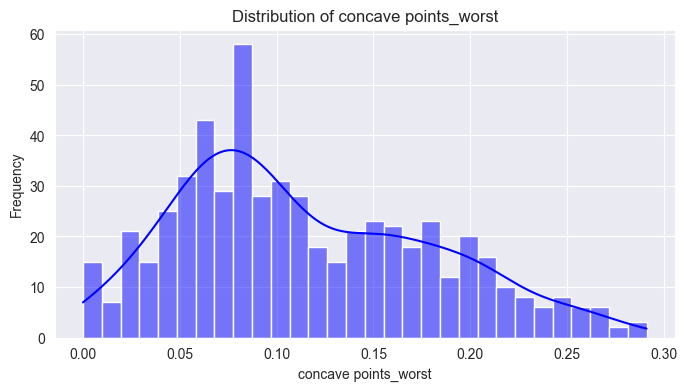

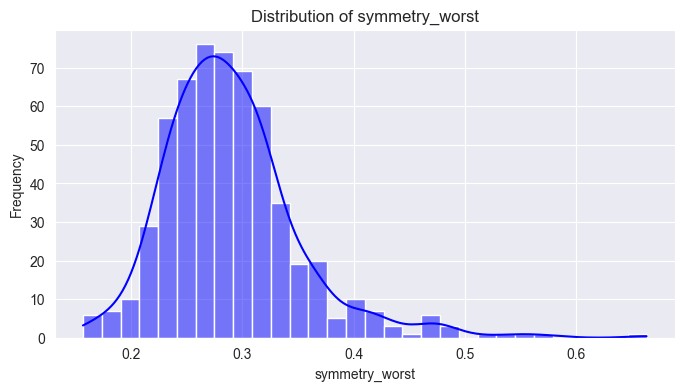

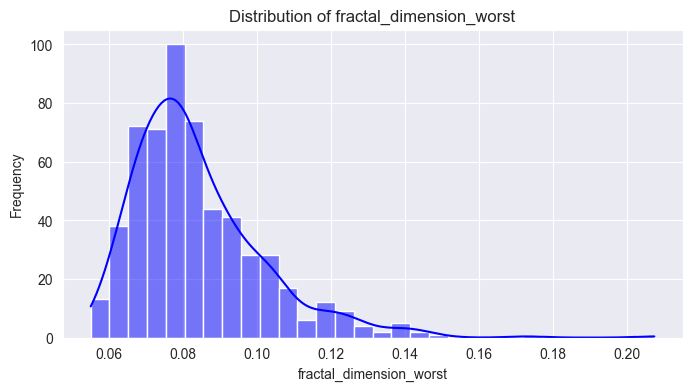

In [22]:
numeric_df = df.select_dtypes(include=['number'])
if not numeric_df.empty:
    for col in numeric_df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
else:
    print("No numeric features available for plotting distributions.")

### Count Plots for Categorical Variables (M: Malignant (cancerous), B: Benign (non-cancerous))

C:\Users\Merle\AppData\Local\Temp\ipykernel_20164\377295086.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


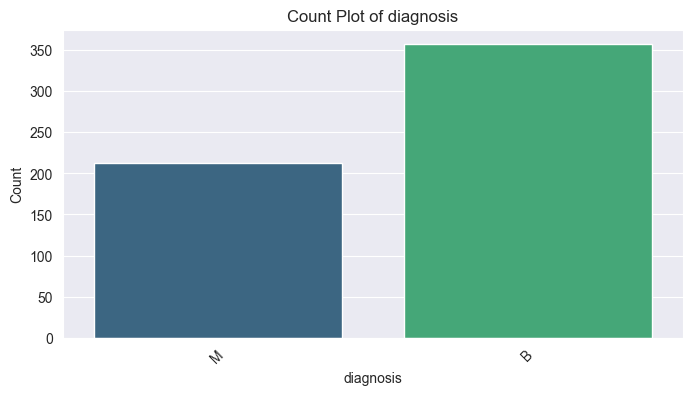

In [23]:
categorical_df = df.select_dtypes(include=['object'])
if not categorical_df.empty:
    for col in categorical_df.columns:
        plt.figure(figsize=(8, 4))
        # Set hue=None to avoid the warning
        sns.countplot(data=df, x=col, palette='viridis')
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
else:
    print("No categorical features available for count plots.")

### Correlation Heatmap

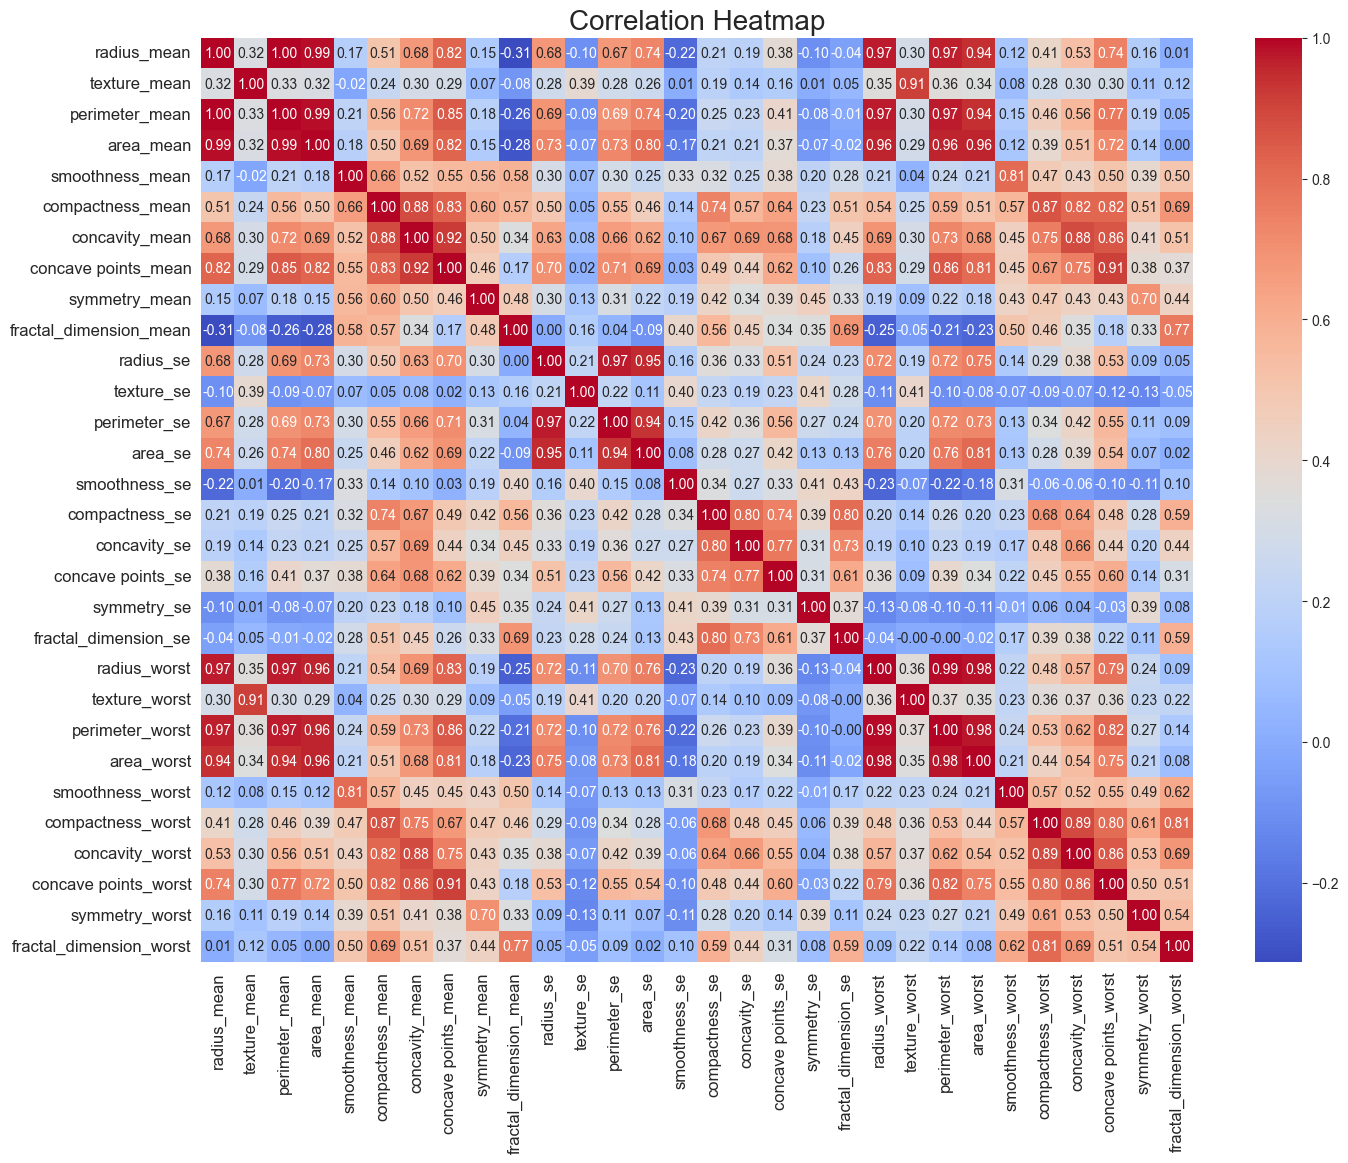

In [24]:
numeric_df = df.select_dtypes(include=['number'])
if not numeric_df.empty:
    plt.figure(figsize=(16, 12)) 
    sns.heatmap(
        numeric_df.corr(),
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        cbar=True,
        annot_kws={"size": 10}, 
    )
    plt.title("Correlation Heatmap", fontsize=20) 
    plt.xticks(fontsize=12) 
    plt.yticks(fontsize=12) 
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")

### Pairplot for Feature Relationships using PCA

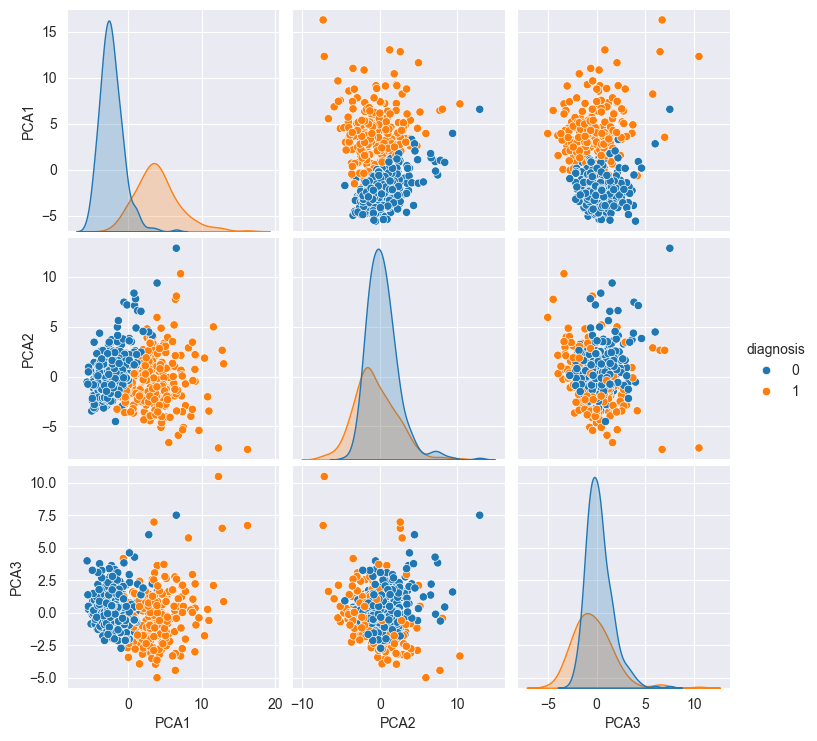

In [25]:
# Encode the 'diagnosis' column to numeric
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])  # 'M' -> 1, 'B' -> 0


# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)  # Reduce to 3 components
pca_features = pca.fit_transform(features_scaled)

# Create a new DataFrame with PCA components
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['diagnosis'] = df['diagnosis']

# Plot the pairplot
sns.pairplot(pca_df, hue='diagnosis')
plt.show()

### Box Plots for Outlier Detection

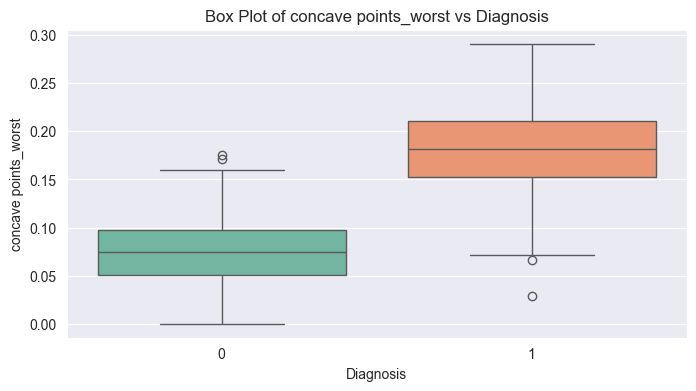

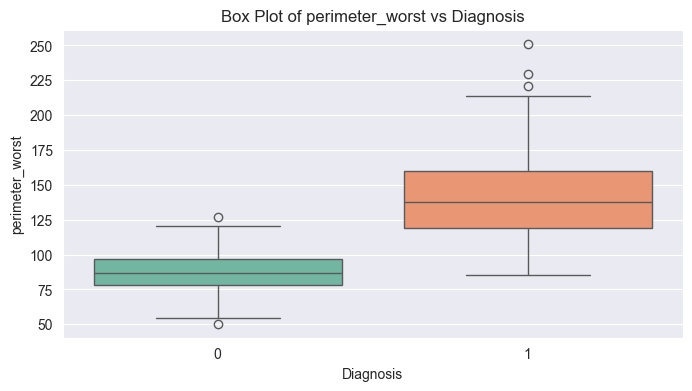

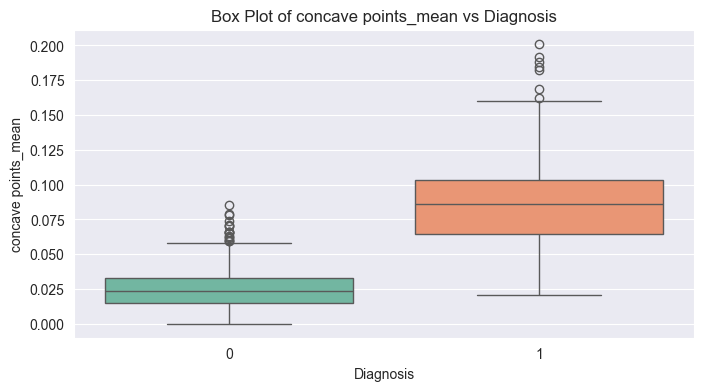

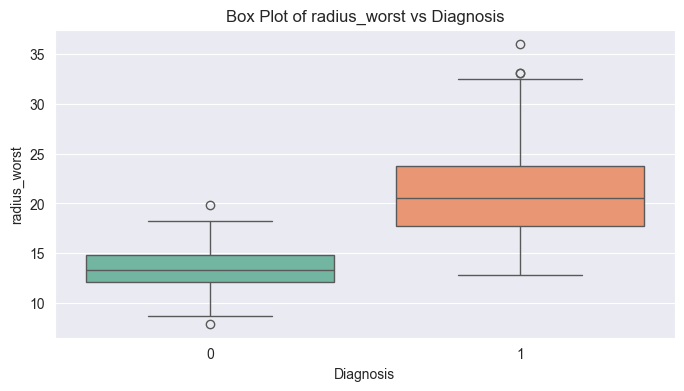

In [26]:
# Calculate correlation with the target variable, only show the 5 most correlated ones
correlation_matrix = df.corr()
correlated_features = correlation_matrix['diagnosis'].abs().sort_values(ascending=False).head(5).index

# Plot box plots for selected features
for col in correlated_features:
    if col != 'diagnosis':  # Skip the target column itself
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x='diagnosis', y=col, hue='diagnosis', palette='Set2', dodge=False)
        plt.title(f'Box Plot of {col} vs Diagnosis')
        plt.xlabel('Diagnosis')
        plt.ylabel(col)
        plt.legend([], [], frameon=False)  # Remove legend if not needed
        plt.show()

